# Exercise MLflow
In this exercise we will uses the `diabetes` dataset in scikit-learn and predicts the progression metric (a quantitative measure of disease progression after one year after) based on BMI, blood pressure, etc. We will uses the scikit-learn ElasticNet linear regression model, where we vary the `alpha` and `l1_ratio` parameters for tuning. We will use MLflow to log  metrics, parameters, artifacts and model. For more information on ElasticNet, refer to:
  * [Elastic net regularization](https://en.wikipedia.org/wiki/Elastic_net_regularization)
  * [Regularization and Variable Selection via the Elastic Net](https://web.stanford.edu/~hastie/TALKS/enet_talk.pdf)


**Required Libraries**: 
* `mlflow==1.7.0` via PyPI

When we talk about “predicting disease progression in diabetes patients,” we mean using a model to guess how a person’s diabetes might get worse over time. 

Think of it like this: Imagine a doctor wants to know how your diabetes might look a year from now. Will it stay about the same, or might it get worse? If a model can help the doctor predict that, they can give you specific advice to help you keep it from progressing too quickly. 

### Example
Let’s say you’re managing diabetes, and some things—like your weight, blood sugar levels, and blood pressure—are measured regularly. By looking at these numbers, a model might predict that if nothing changes, your diabetes could get worse in a year. 

With this prediction, your doctor could say, *“Based on your current health, you might need to be more careful with your diet or exercise a bit more.”* The goal is to catch any warning signs early, so you can make changes that keep your health on track.

In this example, the model is like a tool helping doctors and patients plan ahead by predicting what might happen if things stay the same.

In [0]:
%run "./Includes/Classroom-Setup"

Initialized classroom variables & functions...

Datasets are already mounted to /mnt/training from wasbs://training@dbtrainwesteurope.blob.core.windows.net/

Created user-specific database

Using the database saifahmed_k_outlook_com_db .

All done!

### Write Your ML Code Based on the`train_diabetes.py` Code
This lab is based on the MLflow's [train_diabetes.py](https://github.com/mlflow/mlflow/blob/master/examples/sklearn_elasticnet_diabetes/osx/train_diabetes.py) example, which uses the `sklearn.diabetes` built-in dataset to predict disease progression based on various factors.

In [0]:
# Install mlflow
%pip install mlflow

# Why: MLflow is a powerful tool for tracking machine learning experiments, logging metrics, and saving models.
# Importance: MLflow’s tracking capabilities help document and manage experiments, making it easier to improve models through iterative changes and reproducibility.

Python interpreter will be restarted.
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Not uninstalling typing-extensions at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-d394f887-ece1-4dd6-b2c9-a6d89f291f30
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Not uninstalling requests at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-d394f887-ece1-4dd6-b2c9-a6d89f291f30
    Can't uninstall 'requests'. No files were found to uninstall.
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Not uninstalling markupsafe at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-d394f887-ece1-4dd6-b2c9-a6d89f29

In [0]:
#TODO
# Import various libraries including matplotlib, sklearn, mlflow
import os
import warnings
import sys

import pandas as pd
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

# Import mlflow
import mlflow
import mlflow.sklearn

# Load Diabetes datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Create pandas DataFrame for sklearn ElasticNet linear_model
Y = np.array([y]).transpose()
d = np.concatenate((X, Y), axis=1)
cols = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'progression']
data = pd.DataFrame(d, columns=cols)


When you load the diabetes dataset and split it into `X` (the main data) and `y` (the progression target), here’s what the shapes look like:

1. `X = diabetes.data`  
   - Shape: `(442, 10)`
   - This is a 2D array where each of the 442 rows represents a patient, and each row has 10 columns (one for each feature like age, BMI, etc.).

2. `y = diabetes.target`  
   - Shape: `(442,)`
   - This is a 1D array with 442 values, one for each patient, representing the progression score.

### Why `Y = np.array([y]).transpose()` is Needed

We need `y` to be a 2D array with a shape of `(442, 1)` so it can be combined with `X`. This is why the code does two things:

1. **Wrap `y` in square brackets**:  
   - `np.array([y])` changes `y` from a shape of `(442,)` to `(1, 442)`, making it a 2D array with a single row.

2. **Transpose to make it a single column**:  
   - The `transpose()` function then changes the shape from `(1, 442)` to `(442, 1)`, making it a single column with 442 rows.

### Final Shapes
After transposing:
- `X` is `(442, 10)`, and `Y` is `(442, 1)`.
  
Now, they match in the number of rows and can be combined side-by-side with `np.concatenate((X, Y), axis=1)`.

### Example of Why This is Necessary
If you tried to concatenate `X` and `y` without this step, Python would throw an error because `X` is `(442, 10)` and `y` is `(442,)`—they’re not the same shape in terms of dimensions (2D vs. 1D), so they can’t be combined directly.

The variable `d` here is the combined data array that includes both the original features from `X` and the target progression values from `y`. Here’s a breakdown of what `d` represents and how it’s created:

1. **Combination of Features and Target**:
   - The `X` array contains the original feature data, like age, sex, BMI, etc., with shape `(442, 10)`.
   - The `Y` array contains the target progression scores as a single column with shape `(442, 1)`.

2. **Concatenation**:
   - `d = np.concatenate((X, Y), axis=1)` combines `X` and `Y` side-by-side, along the columns (indicated by `axis=1`).
   - After concatenation, `d` has a shape of `(442, 11)`, with the first 10 columns being the features from `X` and the 11th column being the progression scores from `Y`.

3. **Creating a DataFrame**:
   - `data = pd.DataFrame(d, columns=cols)` converts the combined array `d` into a Pandas DataFrame, using `cols` as column names.
   - `cols` is a list that labels each column: `['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'progression']`.
  
In summary, `d` is the complete array with both features and target, making it ready to be turned into a DataFrame for easier analysis.

### Plot the ElasticNet Descent Path
As an example of recording arbitrary output files in MLflow, plot the [ElasticNet Descent Path](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html) for the ElasticNet model by *alpha* for the specified *l1_ratio*.

The `plot_enet_descent_path` function below:
* Returns an image that can be displayed in our Databricks notebook via `display`
* As well as saves the figure `ElasticNet-paths.png` to the Databricks cluster's driver node
* Upload the file to MLflow using the `log_artifact` within `train_diabetes`

In [0]:
def plot_enet_descent_path(X, y, l1_ratio):
    # Compute paths
    eps = 5e-3  # the smaller it is the longer is the path

    # Reference the global image variable
    global image
    
    print("Computing regularization path using ElasticNet.")
    alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=l1_ratio, fit_intercept=False)

    # Display results
    fig = plt.figure(1)
    ax = plt.gca()

    colors = cycle(['b', 'r', 'g', 'c', 'k'])
    neg_log_alphas_enet = -np.log10(alphas_enet)
    for coef_e, c in zip(coefs_enet, colors):
        l1 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    title = 'ElasticNet Path by alpha for l1_ratio = ' + str(l1_ratio)
    plt.title(title)
    plt.axis('tight')

    # Display images
    image = fig
    
    # Save figure
    fig.savefig("ElasticNet-paths.png")

    # Close plot
    plt.close(fig)

    # Return images
    return image    

Elastic Net is a type of regression method that combines two regularization techniques: **Lasso (L1)** and **Ridge (L2)**. It helps us make more accurate predictions by balancing complexity and relevance of the model.

### Why Elastic Net Is Useful

Imagine you're trying to build a model to predict someone's health risk based on several factors, like age, blood pressure, and weight. Some factors might be really important, while others add unnecessary noise or are too closely related to each other (for example, "weight" and "BMI" are both related to body size). **Elastic Net** addresses these issues by giving the model two key benefits:

1. **Simplicity (via Lasso)**:
   - Lasso (L1 regularization) pushes the model to make some of the less important feature weights **zero**. This removes unimportant features entirely, creating a simpler, easier-to-understand model. 

2. **Balance and Stability (via Ridge)**:
   - Ridge (L2 regularization) reduces the impact of each feature’s weight without making them zero, which can be especially useful when certain features are similar or correlated. This stabilizes the model and helps prevent overemphasis on any single feature.

By **combining Lasso and Ridge**, Elastic Net allows us to have the best of both worlds. It finds a balance between ignoring irrelevant features (like Lasso does) and stabilizing the remaining ones (like Ridge does).

### Why Is Elastic Net Useful in This Case?

In real-world data, especially in medical or biological fields like diabetes research, there are often:
- **Many features** that may not all be equally important.
- **Correlated features**, where some are closely related or even redundant.
  
Elastic Net helps here because:
- It **selects only the most important factors**.
- It **handles correlated features well**, improving the stability of predictions.


Elastic Net allows us to:
- **Build simpler, more interpretable models** that are easier to understand and use.
- **Reduce overfitting** by ignoring features that don't add much value.
- **Improve accuracy and stability**, which is especially helpful when predicting complex conditions like disease progression.

In short, Elastic Net gives us a **balanced and reliable prediction model** that doesn't overreact to unimportant details, making it a popular choice in fields with complex data like healthcare.

Elastic Net regularization path and plotting the results.

### Step 1: Set the Regularization Path Precision

```python
eps = 5e-3  # the smaller it is, the longer is the path
```

**Explanation:**
- The variable `eps` determines **how finely we look at different values of alpha** (the regularization strength).
- Alpha is the parameter in Elastic Net that controls how much regularization we apply to the model, affecting the values of the model’s coefficients.
- A **smaller value of `eps`** means the range of alpha values will be **more densely populated**, meaning we’ll see more steps along the regularization path. This results in a longer and more detailed path but increases computation time.
  
**Example:**
  - If `eps = 0.01`, we might get a few steps along the path, providing a general idea of how the coefficients change.
  - If `eps = 0.001`, we’ll get many more steps, allowing us to see finer details of how coefficients shift for small changes in alpha.

### Step 2: Calculate ElasticNet Paths

```python
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=l1_ratio, fit_intercept=False)
```

**Explanation:**
- `enet_path` calculates the Elastic Net regularization path, which is a sequence of models trained with increasing levels of regularization.
- It computes the **coefficients of each feature** at various values of the regularization parameter alpha. This gives us the coefficients at each point along the path, from very low to very high regularization.
- `enet_path` returns three main outputs:
  - `alphas_enet`: the different values of alpha tested. These are ordered from low to high, so as we move through them, regularization increases.
  - `coefs_enet`: the coefficients of each feature across all values of alpha. Each row represents one feature, showing how its coefficient changes as alpha increases.
  - The third output is an array of dual gaps, used internally to check the convergence of the solution and can be ignored here (thus, `_` is used as a placeholder).

**How `l1_ratio` Affects Elastic Net Regularization:**
- **`l1_ratio`** defines the balance between **Lasso (L1)** and **Ridge (L2)** regularization.
  - `l1_ratio = 1` means pure Lasso, which will likely drive many coefficients to zero.
  - `l1_ratio = 0` means pure Ridge, where all features are kept but their values are shrunk.
  - A value between 0 and 1 provides a balance, keeping only relevant features and shrinking their coefficients as needed.

### Step 3: Set Up the Plot

```python
fig = plt.figure(1)
ax = plt.gca()
colors = cycle(['b', 'r', 'g', 'c', 'k'])
```

**Explanation:**
- **`plt.figure(1)`**: This initializes a new figure, `fig`, where our plot will be displayed.
- **`plt.gca()`**: This command retrieves the current active axis, `ax`, for the plot. We use `ax` to further customize the plot.
- **`colors = cycle(['b', 'r', 'g', 'c', 'k'])`**: This cycles through different colors to visually distinguish the coefficient paths of each feature on the plot.
  
Each feature’s coefficient path is shown in a different color. This makes it easy to track individual features and see how each one behaves as alpha (regularization strength) changes.

### Why This Plot is Helpful

This setup helps us **visualize how each feature’s importance changes with increasing regularization**:
- The x-axis (alpha values) shows how much regularization is applied, moving from low to high.
- The y-axis (coefficient values) shows each feature’s weight.
- Each line represents a feature's path, so we can see which features retain influence and which ones shrink to zero as regularization tightens.

### Summary

1. **Set the Path Precision (`eps`)**: Smaller values give a more detailed view but require more computation.
2. **Calculate Elastic Net Paths**: This provides the range of alpha values and corresponding coefficients to visualize the regularization effect on features.
3. **Set Up the Plot**: Prepares the plot and assigns colors to show each feature’s path distinctly.

Plotting this path allows us to analyze which features remain robust predictors as regularization increases and which become less influential, helping in model interpretation and fine-tuning.

### Train the Diabetes Model
The next function trains ElasticNet linear regression based on the input parameters of `alpha (in_alpha)` and `l1_ratio (in_l1_ratio)`.

In addition, this function uses MLflow Tracking to record its
* parameters
* metrics
* model
* arbitrary files, namely the above noted Lasso Descent Path plot.

**Tip:** Use `with mlflow.start_run:` in the Python code to create a new MLflow run. This is the recommended way to use MLflow in notebook cells. Whether your code completes or exits with an error, the `with` context will make sure to close the MLflow run, so you don't have to call `mlflow.end_run`.

In [0]:
#TODO
# train_diabetes
#   Uses the sklearn Diabetes dataset to predict diabetes progression using ElasticNet
#       The predicted "progression" column is a quantitative measure of disease progression one year after baseline
#       http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
def train_diabetes(data, in_alpha, in_l1_ratio):
  # Evaluate metrics
  def eval_metrics(actual, pred):
      rmse = np.sqrt(mean_squared_error(actual, pred))
      mae = mean_absolute_error(actual, pred)
      r2 = r2_score(actual, pred)
      return rmse, mae, r2

  warnings.filterwarnings("ignore")
  np.random.seed(40)

  # Split the data into training and test sets. (0.75, 0.25) split.
  train, test = train_test_split(data)

  # The predicted column is "progression" which is a quantitative measure of disease progression one year after baseline
  train_x = train.drop(["progression"], axis=1)
  test_x = test.drop(["progression"], axis=1)
  train_y = train[["progression"]]
  test_y = test[["progression"]]

  if float(in_alpha) is None:
    alpha = 0.05
  else:
    alpha = float(in_alpha)
    
  if float(in_l1_ratio) is None:
    l1_ratio = 0.05
  else:
    l1_ratio = float(in_l1_ratio)
  
  # Start an MLflow run; the "with" keyword ensures we'll close the run even if this cell crashes
  with mlflow.start_run():
    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    lr.fit(train_x, train_y)

    predicted_qualities = lr.predict(test_x)

    (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

    # Print out ElasticNet model metrics
    print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
    print("  RMSE: %s" % rmse)
    print("  MAE: %s" % mae)
    print("  R2: %s" % r2)

    # Set tracking_URI first and then reset it back to not specifying port
    # Note, we had specified this in an earlier cell
    #mlflow.set_tracking_uri(mlflow_tracking_URI)
    # Log mlflow attributes for mlflow UI
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1_ratio)
    # log rmse
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    # log mae
    mlflow.log_metric("mae", mae)
    mlflow.sklearn.log_model(lr, "model")
    modelpath = "/dbfs/mlflow/test_diabetes/model-%f-%f" % (alpha, l1_ratio)
    mlflow.sklearn.save_model(lr, modelpath)
    
    # Call plot_enet_descent_path
    image = plot_enet_descent_path(X, y, l1_ratio)
    
    # Log artifacts (output files)
    mlflow.log_artifact("ElasticNet-paths.png")

MLflow Logging
The train_diabetes function will also include MLflow commands to:

Log Parameters: Captures alpha and l1_ratio values for experiment tracking.

Log Metrics: Stores the calculated RMSE, MAE, and R² scores, which help in model comparison.

Log Model: Saves the trained model to MLflow, allowing easy retrieval for future use or deployment.

Log Artifacts: The ElasticNet Descent Path plot will be logged as an artifact, storing visual insights into model behavior.

Importance of MLflow in This Notebook

Reproducibility: With MLflow, any experiment (combination of parameters, metrics, and model) can be reproduced by simply retrieving its unique run.

Parameter Tuning: With the ability to log different model runs, MLflow allows quick comparisons to find optimal parameters.

Deployment Readiness: By saving models directly to MLflow, this notebook establishes a foundation for model versioning and deployment.

### Experiment with Different Parameters

Call `train_diabetes` with different parameters. Later, you'll be able to visualize all these runs in the MLflow experiment.

In [0]:
%fs rm -r dbfs:/mlflow/test_diabetes

res4: Boolean = false

In [0]:
# alpha and l1_ratio values of 0.01, 0.01
train_diabetes(data, 0.01, 0.01)

Elasticnet model (alpha=0.010000, l1_ratio=0.010000):
  RMSE: 71.40362571026475
  MAE: 60.09124839565383
  R2: 0.2291130640003659
2024/10/27 10:45:39 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/repl_tmp_data/ReplId-27b7e-a98fc-9ac94-3/tmpravjstig/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==0.24.2', 'cloudpickle==3.1.0']. Set logging level to DEBUG to see the full traceback. 
2024/10/27 10:45:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 10:45:43 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /dbfs/mlflow/test_diabetes/model-0.010000-0.010000/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==0.24.2', 'cloudpickle==3.1.0']. Set logging level to DEBUG to see the full trace

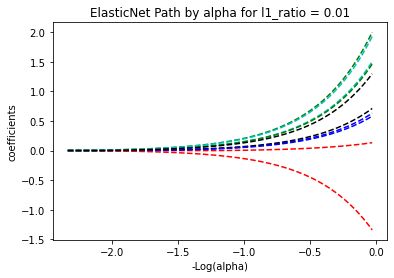

In [0]:
display(image)

Plotting the path in `plot_enet_descent_path` helps us **visualize how the model's coefficients change** as we adjust the level of regularization. This plot, also called the **Elastic Net path**, gives insights into the behavior of each feature as the model becomes more or less restrictive.

### Why This Plot is Useful

1. **Understanding Feature Importance**:
   - By plotting the coefficients' paths, we see which features are the most important at different levels of regularization. Features with stronger, more consistent coefficient values across the path are likely more influential in predicting the target variable.

2. **Choosing the Right Regularization Level (Alpha)**:
   - Elastic Net has a regularization parameter called **alpha** that controls how much the model should "shrink" feature weights. This plot helps us find a sweet spot: too little regularization means overfitting (keeping too many features with high values), while too much regularization could mean underfitting (overly shrinking or removing valuable features).
   - By observing where the coefficients stabilize or start to drop, we can choose an appropriate value of alpha that balances complexity and predictive power.

3. **Effect of L1 Ratio**:
   - The **l1_ratio** determines how much the model favors Lasso vs. Ridge regularization. This plot shows how the coefficients behave with different settings of l1_ratio, helping us understand how a more Lasso-heavy or Ridge-heavy approach affects the model.

### What the Plot Shows

- **X-axis**: Usually shows the negative log of alpha, representing how much regularization is applied. Moving left to right means moving from low regularization (keeping more features) to high regularization (shrinking/removing more features).
- **Y-axis**: Shows the values of the coefficients for each feature. Each line represents one feature.
- **Line Paths**: Each colored line shows how a feature’s weight changes as alpha increases. Features that quickly go to zero are less important, while stable ones are more predictive.

### Example in Practice

Let's say you’re building a model to predict diabetes progression and you want to understand which factors matter most (e.g., BMI, blood pressure, glucose levels). By plotting the Elastic Net path:
- You might see that some features, like BMI, remain strong predictors even as regularization increases, suggesting it's important.
- Other features might quickly drop to zero as regularization increases, indicating they're not very useful.

This visualization can guide you in **selecting important features** and **tuning the model** for optimal performance without overfitting or underfitting.

### In Summary

The Elastic Net path plot provides a clear visual guide to:
- **Feature selection** by showing which factors are important.
- **Optimal regularization levels** to balance model simplicity and accuracy.


In [0]:
# alpha and l1_ratio values of 0.01, 0.75
train_diabetes(data, 0.01, 0.75)

Elasticnet model (alpha=0.010000, l1_ratio=0.750000):
  RMSE: 65.28994906390733
  MAE: 53.75914828434926
  R2: 0.35547047607749416
2024/10/27 10:46:04 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/repl_tmp_data/ReplId-27b7e-a98fc-9ac94-3/tmpavkjgmms/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==0.24.2', 'cloudpickle==3.1.0']. Set logging level to DEBUG to see the full traceback. 
2024/10/27 10:46:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 10:46:07 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /dbfs/mlflow/test_diabetes/model-0.010000-0.750000/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==0.24.2', 'cloudpickle==3.1.0']. Set logging level to DEBUG to see the full trac

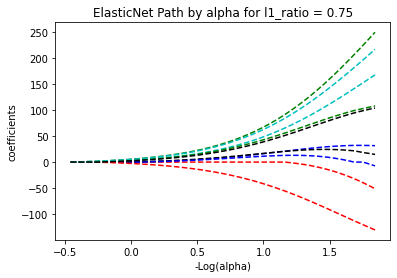

In [0]:
display(image)

In [0]:
# alpha and l1_ratio values of 0.01, .5
train_diabetes(data, 0.01, .5)

Elasticnet model (alpha=0.010000, l1_ratio=0.500000):
  RMSE: 67.98354871814037
  MAE: 56.73838604280737
  R2: 0.30119208073981796
2024/10/27 10:46:22 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/repl_tmp_data/ReplId-27b7e-a98fc-9ac94-3/tmpgdcsj451/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==0.24.2', 'cloudpickle==3.1.0']. Set logging level to DEBUG to see the full traceback. 
2024/10/27 10:46:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 10:46:26 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /dbfs/mlflow/test_diabetes/model-0.010000-0.500000/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==0.24.2', 'cloudpickle==3.1.0']. Set logging level to DEBUG to see the full trac

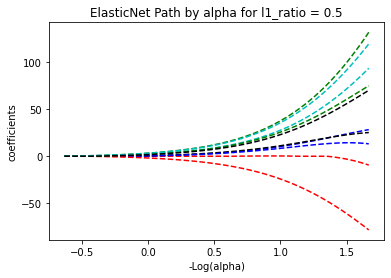

In [0]:
display(image)

In [0]:
# alpha and l1_ratio values of 0.01, 1
train_diabetes(data, 0.01, 1)

Elasticnet model (alpha=0.010000, l1_ratio=1.000000):
  RMSE: 63.24666777876805
  MAE: 51.05182860408632
  R2: 0.3951809598912357
2024/10/27 10:46:36 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/repl_tmp_data/ReplId-27b7e-a98fc-9ac94-3/tmp3zt9ept3/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==0.24.2', 'cloudpickle==3.1.0']. Set logging level to DEBUG to see the full traceback. 
2024/10/27 10:46:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 10:46:40 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /dbfs/mlflow/test_diabetes/model-0.010000-1.000000/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==0.24.2', 'cloudpickle==3.1.0']. Set logging level to DEBUG to see the full trace

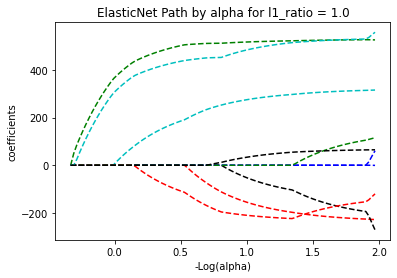

In [0]:
display(image)

### View the run, experiment, run details, and notebook revision

1. Click the **Runs** icon in the notebook context bar to display the Runs sidebar. In the sidebar, you can view the run parameters and metrics. For example: <img src="https://docs.databricks.com/_static/images/mlflow/mlflow-notebook-experiments.gif"/>
   
1. Click the External Link icon <img src="https://docs.databricks.com/_static/images/external-link.png"/> in the Runs context bar to view the notebook experiment. For example: <img src="https://docs.databricks.com/_static/images/mlflow/quick-start-nb-experiment.png"/>